## 1. За даною вибіркою (з інд. Завдання №1-2) побудувати гістограму і графік реалізації емпіричної функції розподілу  $F^*_{n}(y)$

*Завантаження необхідних бібліотек*


**pandas** - для роботи з даними з таблиці 

**numpy** - для математичних обчислень 

**seaborn** - для кращого вигляду графіків 

**matplotlib.pyplot** - для роботи з графіками 

In [1]:
#Завантаження необхідних бібліотек

import pandas as pd
import numpy as np
import seaborn as sns
sns.set() # для кращого вигляду графіків

#завантажимо додаткові бібліотеки для гістограми і коробки з вусами
import matplotlib.pyplot as plt

import scipy.stats as st 

### Завантаження таблиці через Pandas

Вибираємо дані варіанту №1 (usecols="A"). Оскільки файл не містив заголовків, тому було обрано *header=None* та дано назву першій колонці *Var1*

In [2]:
# Завантаження таблиці-excel через Pandas, вибираючи дані варіанту №1
df = pd.read_excel("Data1.xlsx", header=None, usecols="A", names=["Var1"])
data = df["Var1"]

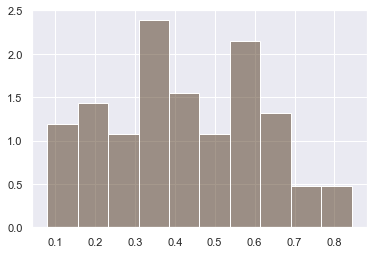

In [3]:
# побудова гістограми
plt.hist(data, density = True, fc=(0.3, 0.2,0.1,0.5))
plt.show()

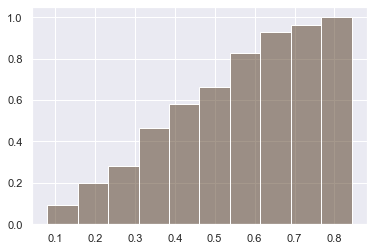

In [4]:
# побудова емпіричної функції розподілу
plt.hist(data,density = True, cumulative=True, fc=(0.3, 0.2,0.1,0.5))
plt.show()

### а) Припустити, що вибірка розподілена за нормальним законом і знайти параметри нормального розподілу методом моментів.


Шукаємо стільки моментів, скільки параметрів.

Ми знаємо, що для нормального розподілу

$E(X_i) = \mu = \frac{1}{N}\sum_{i=1}^N{x_i} $

$E(X_i^2) = \sigma^2 + \mu^2 = \frac{1}{N}\sum_{i=1}^N{x_i^2}$

$\sigma^2 = \frac{1}{N}\sum_{i=1}^N{x_i^2} - \mu^2 $

$\sigma^2 = \frac{1}{N}\sum_{i=1}^N{x_i^2} - (\bar{x})^2 $

$\sigma^2 = \frac{1}{N}\sum_{i=1}^N{(x_i-\bar{x})^2} $

Тож далі ми прирівнюємо обраховані значення до цих теоретичних

In [17]:
# Шукаємо стільки моментів, скільки параметрів

mu_2 = lambda values: (sum([v**2 for v in values])  / len(values))

# mu = mean
data_mu = data.mean()
data_mu_2 = mu_2(data)

print(data_mu, data_mu_2)

sigma2 = lambda values, mean: (sum([(v-mean)**2 for v in values])  / len(values))
sigma_sq = sigma2(data, data_mu)

print(f'mu = mean = {data_mu}')
print(f'stdMM= {np.sqrt(sigma_sq)}   std_function= {data.std()}')

0.42301818181818196 0.21388209090909097
mu = mean = 0.42301818181818196
stdMM= 0.1869163148586302   std_function= 0.1877717715699001


### б) Знайти  параматри нормального розподілу і побудувати криву нормального розподілу засобами Python. 


In [18]:
# обчислюємо параметри для нормального розподілу, припустивши що вибірка розподілена за нормальним законом
# a = mean
# sigma = standard deviation
a, sigma = st.distributions.norm.fit(data)

In [19]:
a, sigma

(0.42301818181818185, 0.1869163148586302)

Порівнюючи знайдені параметри методом моментів та за допомогою функцій Python переконуємося в достовірності значень

In [20]:
# задаємо лінійний простір на проміжку значень вхідних даних [-0.5,1.5]
# 150 - кількість заданих точок
ix = np.linspace(-0.5,1.5,100)

In [21]:
# Отримуємо функцію щільності нормального розподілу при заданих середньому та середньоквадратичному
n_fitted_data = st.distributions.norm.pdf(ix, a, sigma)

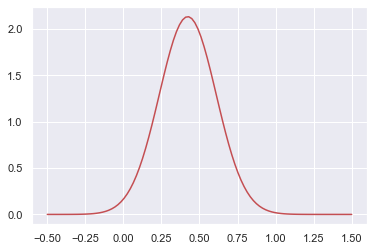

In [22]:
plt.plot(ix,n_fitted_data,'r-')
plt.show()

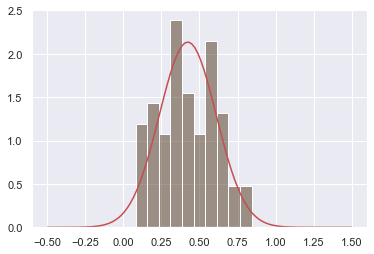

In [23]:
# Малюємо два графіки разом
plt.hist(data, density = True, cumulative = False, fc=(0.3, 0.2,0.1,0.5))
plt.plot(ix,n_fitted_data,'r-')
plt.show()

### в) Припустити, що вибірка має якийсь інший розподіл (Коші, Стьюдента, або інш).  Засобами Python знайти параметри цього розподілу і побудувати криву цього розподілу.

In [24]:
# визначаємо значення на ОХ [-0.25,1.25].
Ox = np.linspace(-0.25,1.25,10)
ix = np.linspace(-0.25,1.25,20)

In [25]:
# обчислюємо параметри для Стьюдент розподілу
# loc = зсув
# scale = масштаб
# y = (x - loc) / scale
x, loc, scale = st.distributions.t.fit(data)
x, loc, scale 

(10418139.123878762, 0.42302180266736555, 0.18691657724918748)

In [26]:
# обчислюємо значення теоеретичної функції Student та 
# нормального розподілів для підібраних параметрів
# Ox для розподілу Стьюдента, оскільки на значеннях >18 він стає як нормальний
t_fitted_data = st.distributions.t.pdf(Ox, x, loc, scale)
n_fitted_data = st.distributions.norm.pdf(ix, a, sigma)


In [27]:
# обчислюємо параметри для еспоненційного розподілу та 
# значення теоеретичної функції розподілу для підібраних параметрів
loc_e, scale_e = st.distributions.expon.fit(data)
e_fitted_data = st.distributions.expon.pdf(ix, loc_e, scale_e)
loc_e, scale_e

(0.081, 0.34201818181818183)

In [28]:
# обчислюємо параметри для Гамма розподілу та 
# значення теоеретичної функції розподілу для підібраних параметрів
alpha_g, loc_g, beta_g = st.distributions.gamma.fit(data)
g_fitted_data = st.distributions.gamma.pdf(ix, alpha_g, loc_g, beta_g)
alpha_g, loc_g, beta_g

(8.732580111002978, -0.1446725057532664, 0.06499034058266745)

In [29]:
# обчислюємо параметри для розподілу Коші та 
# значення теоеретичної функції розподілу для підібраних параметрів
loc_c, scale_c = st.distributions.cauchy.fit(data)
c_fitted_data = st.distributions.cauchy.pdf(ix, loc_c, scale_c)
loc_c, scale_c

(0.4018876802883461, 0.13346856792717432)

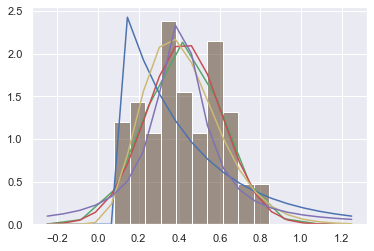

In [30]:
# будуємо на одному графіку гістограму і щільність теоретичних розподілів
plt.hist(data, density = True, cumulative = False, fc=(0.3, 0.2,0.1,0.5))
plt.plot(Ox,t_fitted_data,'g-')
plt.plot(ix,n_fitted_data,'r-')
plt.plot(ix,e_fitted_data,'b-')
plt.plot(ix,g_fitted_data,'y-')
plt.plot(ix,c_fitted_data,'m-')
plt.show()

- За візуальним спостереженням найближче відображає дані частот щільність Гамма-розподілу, що виділений жовтим кольором. 
- Хоча Коші розподіл дає найближче значення до найбільшої частоти, але не більшість значень стовпчиків гістограми. 
- Не дуже коректно себе поводить експоненційний розподіл

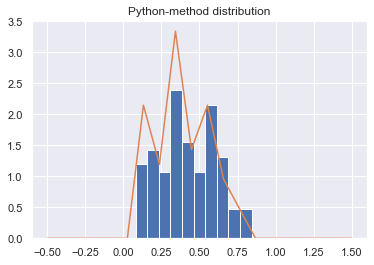

In [31]:
# Генерування розподілу за даної гістограми методами python
hist = np.histogram(data, bins=20)
hist_dist = st.rv_histogram(hist)

X = np.linspace(-0.5, 1.5, 20)
plt.title("Python-method distribution")
plt.hist(data, density=True, bins=10)
plt.plot(X, hist_dist.pdf(X), label='PDF')
# plt.plot(X, hist_dist.cdf(X), label='CDF')
plt.show()

## 2. Знайти оцінку максимальної правдоподібності двовимірного параметра (a,b) для рівномірного розподілу на відрізку [a,b] . Див. Табл.

Функція правдоподібності -- добуток n-ї кількості функції щільності для кожного значення з вибірки (від вибірки розміру n, що має незалежно розподілені величини)

Далі беремо похідну від функції правдоподібності.

Прирівнюємо знайдене до нуля, щоб знайти де функція набуває найбільше значення (похідна змінює знак з "-" на "+").

Функція щільності для рівномірного розподілу $f(x) = \frac{1}{(b-a)}\quad \text{для}\; a\leq x \leq b $.

Беремо n точок з цього проміжку та виходить, що функція правдоподібності буде:

$Z(a,b) = (\frac{1}{(b-a)}) ^n$

$\log{Z} = -n\log{(b-a)} $



Оцінка максимізує функцію правдоподібності:

$\frac{\partial \log{Z}}{\partial\theta_k} = 0 \quad \rightarrow$


$\frac {\partial\log{Z}}{\partial a} = \frac{n}{(b-a)} \; - \;$ похідна монотонно зростає. Тому оцінкою максимальної правдоподібності буде найбільш можливе а: $\min{x_1, \ldots, x_n}$

$\frac {\partial\log{Z}}{\partial b} = -\frac{n}{(b-a)} \; - \;$ похідна монотонно спадає. Тому оцінкою максимальної правдоподібності буде найменш можливе b: $\max{x_1, \ldots, x_n}$



	3	 5	 7	 9	 11	13	15	17	19	21
    21	16	15	26	22	14	21	22	18	25



In [32]:
df = pd.DataFrame({"x_i": [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                 "n_i": [21, 16, 15, 26, 22, 14, 21, 22, 18, 25]
                  })
df

,x_i,n_i
0,3,21
1,5,16
2,7,15
3,9,26
4,11,22
5,13,14
6,15,21
7,17,22
8,19,18
9,21,25


Тоді за таблицею 

$a = \min{x_1, \ldots, x_n} = 3$

$b = \max{x_1, \ldots, x_n} = 21$

In [33]:
a = min(df.x_i)
b = max(df.x_i)
a,b

(3, 21)

## 3. Знайти оцінку методом моментів двовимірного параметра (a,b) для рівномірного розподілу на відрізку [a,b] . Застосувати знайдені формули для знаходження оцінок  невідомих (a,b) рівномірного розподілу, якщо отримана вибірка має вигляд

	3	 5	 7	 9	 11	13	15	17	19	21
    21	16	15	26	22	14	21	22	18	25



### Знайти оцінку (a,b) для рівномірного розподілу 

PDF: $f(x) = \frac{1}{(b-a)} \quad for \; x\in[a,b]$  

Mean (1-st moment): $\bar{x} = \int_a^b {xf(x)dx} = \frac{(a+b)}{2} $

2-nd moment: $\bar{x}_2 = \int_a^b {x^2f(x)dx} = \frac{(a^2+b^2 + ab)}{3}$

https://math.stackexchange.com/questions/1839454/finding-the-method-of-moments-estimator-for-the-uniform-distribution

Прирівняємо теоретичні та емпіричні моменти:

$\bar{x} = \frac{x_1 + \dots + x_n}{n} = \frac{(a+b)}{2}$

$\bar{x}_2 = \frac{x_1^2 + \dots + x_n^2}{n} = \frac{(a^2+b^2 + ab)}{3}$

Виражаємо $a = 2\bar{x}-b \;$ і підставляємо далі: 

$(2\bar{x}-b)^2 + b^2 + (2\bar{x}-b)b = 3\bar{x}_2 $

$b^2 -4\bar{x}b+4\bar{x}^2+b^2+2\bar{x}b-b^2 = 3\bar{x}_2 $

Отримуємо квадратичне рівняння з невідомим b:

$b^2 -2\bar{x}b+4\bar{x}^2 - 3\bar{x}_2 = 0 $

$ \hat{b} = \frac{-(-2\bar{x}) \pm \sqrt{(4\bar{x}^2 - 4(4\bar{x}^2 - 3\bar{x}_2)}}{2} $

Оскільки b > a, то b має бути додатнім:

$ \hat{b} = \bar{x} + \frac12\sqrt{12\bar{x}_2 -12\bar{x}^2} $

$ \hat{b} = \bar{x} + \sqrt{3(\bar{x}_2 -\bar{x}^2)} $

$\hat{a} =2\bar{x} - \bar{x} - \sqrt{3(\bar{x}_2 - \bar{x}^2)}= \bar{x} - \sqrt{3(\bar{x}_2 - \bar{x}^2)} $

### *Формули оцінок невідомих (a,b)*

$\hat{a} = \bar{x} - \sqrt{3(\bar{x}_2 - \bar{x}^2)} = \bar{x} - \sqrt{3 \sigma^2}$

$\hat{b} = \bar{x} + \sqrt{3(\bar{x}_2 - \bar{x}^2)} = \bar{x} + \sqrt{3 \sigma^2}$

Тобто (a,b) виражаються через лінійну комбінацію середнього та середньоквадратичного вибірки.

In [34]:
df = pd.DataFrame({"x_i": [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                 "n_i": [21, 16, 15, 26, 22, 14, 21, 22, 18, 25]
                  })
df

,x_i,n_i
0,3,21
1,5,16
2,7,15
3,9,26
4,11,22
5,13,14
6,15,21
7,17,22
8,19,18
9,21,25


In [35]:
# Пошук першого моменту
x_bar = 0
n = len(df)

for i in range(n):
    x_bar += df.x_i[i]* df.n_i[i]
    
x_bar = x_bar/sum(df.n_i)
x_bar

12.31

In [36]:
# Пошук другого моменту
x_bar_2 = 0
n = len(df)

for i in range(n):
    x_bar_2 += df.x_i[i]**2 * df.n_i[i]
    
x_bar_2 = x_bar_2/sum(df.n_i)
x_bar_2

185.32

In [37]:
# Обрахунок sigma = std = середньо квадратичне відхилення
sigma = np.sqrt(x_bar_2 - x_bar**2)
sigma

5.812391934479297

Тобто в межах ~6 йде розкид чисел

In [38]:
a = x_bar - np.sqrt(3) * sigma
b = x_bar + np.sqrt(3) * sigma
a,b

(2.242641855978306, 22.377358144021695)

За знайденими оцінками шукаємо найближчі значення з наших вибірок - відповідно 3 та 21